# Комп’ютерний практикум 7. Нейрона мережа для задачі класифікації.

In [1]:
import torch
import random
import numpy as np
import pandas as pd

import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [3]:
wine = sklearn.datasets.load_wine()
wine.data.shape

(178, 13)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    wine.data[:, :2],
    wine.target,
    test_size=0.3,
    shuffle=True
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(124, 2) (54, 2) (124,) (54,)


In [5]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([124, 2]) torch.Size([54, 2]) torch.Size([124]) torch.Size([54])


In [6]:
class WineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(WineNet, self).__init__()

        self.fc1 = torch.nn.Linear(2, n_hidden_neurons)
        self.activ1 = torch.nn.ReLU()
        
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = torch.nn.ReLU()
        
        self.fc3 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ3 = torch.nn.ReLU()
        
        self.fc4 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ4 = torch.nn.ReLU()
        
        self.fc5 = torch.nn.Linear(n_hidden_neurons, 3)
        
        self.sm = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        x = self.activ3(x)
        x = self.fc4(x)
        x = self.activ4(x)
        x = self.fc5(x)
        return x
     
    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x

    
wine_net = WineNet(25)

In [7]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(wine_net.parameters(), lr=1.0e-3)

In [8]:
batch_size = 10

for epoch in range(2000):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        batch_indexes = order[start_index:start_index+batch_size]
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]

        preds = wine_net.forward(x_batch)
        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()
        
    if epoch % 100 == 0:
        test_preds = wine_net.forward(X_test)
        test_preds = test_preds.argmax(dim=1)
        print(epoch, (test_preds == y_test).float().mean())

0 tensor(0.4074)
100 tensor(0.5741)
200 tensor(0.7593)
300 tensor(0.8519)
400 tensor(0.8148)
500 tensor(0.8333)
600 tensor(0.8704)
700 tensor(0.7963)
800 tensor(0.7963)
900 tensor(0.8148)
1000 tensor(0.8519)
1100 tensor(0.7963)
1200 tensor(0.8889)
1300 tensor(0.8333)
1400 tensor(0.8333)
1500 tensor(0.8148)
1600 tensor(0.7963)
1700 tensor(0.7963)
1800 tensor(0.7778)
1900 tensor(0.8333)


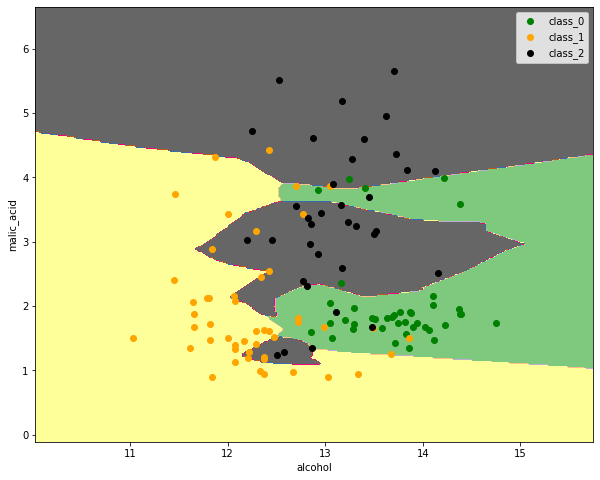

In [9]:
n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = torch.meshgrid(
    torch.arange(x_min, x_max, plot_step), 
    torch.arange(y_min, y_max, plot_step)
)

preds = wine_net.inference(
    torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
)

preds_class = preds.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.contourf(xx, yy, preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
    indexes = np.where(y_train == i)
    
    plt.scatter(
        X_train[indexes, 0],
        X_train[indexes, 1],
        c=color, 
        label=wine.target_names[i], 
        cmap='Accent'
    )
    
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.legend()

# Завдання 1.

__Виконайте вказані зміни, проаналізуйте результат, вкажіть найкращу конфігурацію:__<br>
1) Архітектура нейронної мережі. Ми визначили, що там буде п'ять прихованих нейронів в прихованих шарах, ми могли б поставити якесь інше значення.<br>
2) Змінити кількість прихованих шарів (не два, а може бути один, може бути більше ніж два)<br>
3) градієнтний спуск Adam, а можна вибрати було SGD, а можна було б щось ще.<br>
4) Learning rate ми теж вибирали "з голови".<br>
5) Функція активації.<br>
6) весь набор ознак (зараз ми використовували лише 2, для простої візуалізації)<br>
7) інші поліпшення/зміни.

In [10]:
# Done.

# base result - tensor(0.6852)
# best result - tensor(0.9259) // all features
# best result - 1200 epoch - tensor(0.8889) // two features

# Завдання 2.

In [11]:
# Проаналізуйте тренувальний датасет Breast Cancer Wisconsin (Diagnostic) Data Set та 
# розробіть модель класифікації (класифікація пухлини – колонка таргету -
# Diagnosis (M = malignant(злоякісна), B = benign(доброякісна))).

# Проаналізуйте дані, подивіться кореляції, видаліть сильно корелюючі між
# собою ознаки (із коефіцієнтом кореляції Пірсона більше ніж 0.9).

In [12]:
data = load_breast_cancer()
X, y = data.data, data.target

print(X.shape, y.shape)

(569, 30) (569,)


In [13]:
df = pd.DataFrame(X)
df.shape

(569, 30)

In [14]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr(method='pearson')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

In [15]:
correlation(df, 0.9)
X = df.to_numpy()
X.shape

(569, 21)

In [16]:
TRAIN_PART = 0.8
train_len = int(X.shape[0] * 0.8)
train_len

455

In [18]:
features = torch.FloatTensor(X)
y = torch.LongTensor(y)

# TODO: mix dataset

print(type(features), features.shape)
print(type(y), y.shape)

X_train, X_test = torch.split(features, split_size_or_sections=train_len, dim=0)
y_train, y_test = torch.split(y, split_size_or_sections=train_len, dim=0)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

<class 'torch.Tensor'> torch.Size([569, 21])
<class 'torch.Tensor'> torch.Size([569])
torch.Size([455, 21]) torch.Size([114, 21])
torch.Size([455]) torch.Size([114])


In [19]:
class CancerNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(CancerNet, self).__init__()

        self.fc1 = torch.nn.Linear(21, n_hidden_neurons)
        self.activ1 = torch.nn.ReLU()
        
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = torch.nn.ReLU()
        
        self.fc3 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ3 = torch.nn.ReLU()
        
        self.fc4 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ4 = torch.nn.ReLU()
        
        self.fc5 = torch.nn.Linear(n_hidden_neurons, 2)
        
        self.sm = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        x = self.activ3(x)
        x = self.fc4(x)
        x = self.activ4(x)
        x = self.fc5(x)
        return x
     
    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x

    
cancer_net = CancerNet(50)
cancer_net

CancerNet(
  (fc1): Linear(in_features=21, out_features=50, bias=True)
  (activ1): ReLU()
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (activ2): ReLU()
  (fc3): Linear(in_features=50, out_features=50, bias=True)
  (activ3): ReLU()
  (fc4): Linear(in_features=50, out_features=50, bias=True)
  (activ4): ReLU()
  (fc5): Linear(in_features=50, out_features=2, bias=True)
  (sm): Softmax(dim=1)
)

In [20]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cancer_net.parameters(), lr=1.0e-3)

In [21]:
batch_size = 18

for epoch in range(2000):
    order = np.random.permutation(len(X_train))

    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        batch_indexes = order[start_index:start_index+batch_size]
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = cancer_net.forward(x_batch)
        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    if epoch % 100 == 0:
        test_preds = cancer_net.forward(X_test)
        test_preds = test_preds.argmax(dim=1)
        print(epoch, (test_preds == y_test).float().mean())

0 tensor(0.8333)
100 tensor(0.9737)
200 tensor(0.9825)
300 tensor(0.9737)
400 tensor(0.9737)
500 tensor(0.9386)
600 tensor(0.9825)
700 tensor(0.9561)
800 tensor(0.9386)
900 tensor(0.9561)
1000 tensor(0.8772)
1100 tensor(0.9825)
1200 tensor(0.9123)
1300 tensor(0.9561)
1400 tensor(0.9912)
1500 tensor(0.9474)
1600 tensor(0.9825)
1700 tensor(0.9649)
1800 tensor(0.9737)
1900 tensor(0.9649)
